<a href="https://colab.research.google.com/github/HeliaHashemipour/AP-Workshops/blob/main/DIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Dissolving Is Amplifying: Towards Fine-Grained Anomaly Detection(Optimized-version)***

Medical anomalous data normally contains fine-grained instance-wise additive feature patterns (e.g. tumor, hemorrhage), that are oftenly critical but insignificant. Interestingly, apart from the remarkable image generation abilities of diffusion models, we observed that diffusion models can well-dissolve image details for a given image, resulting in generalized feature representations. We hereby propose DIA, dissolving is amplifying, that amplifies finegrained image features by contrasting an image against its feature dissolved counterpart. In particular, we show that diffusion models can serve as semantic preserving feature dissolvers that help learning fine-grained anomalous patterns for anomaly detection tasks, especially for medical domains with fine-grained feature differences. As a result, our method yields a novel fine-grained anomaly detection method, aims at amplifying instance-level feature patterns, that significantly improves medical anomaly detection accuracy in a large margin without any prior knowledge of explicit fine-grained anomalous feature patterns.

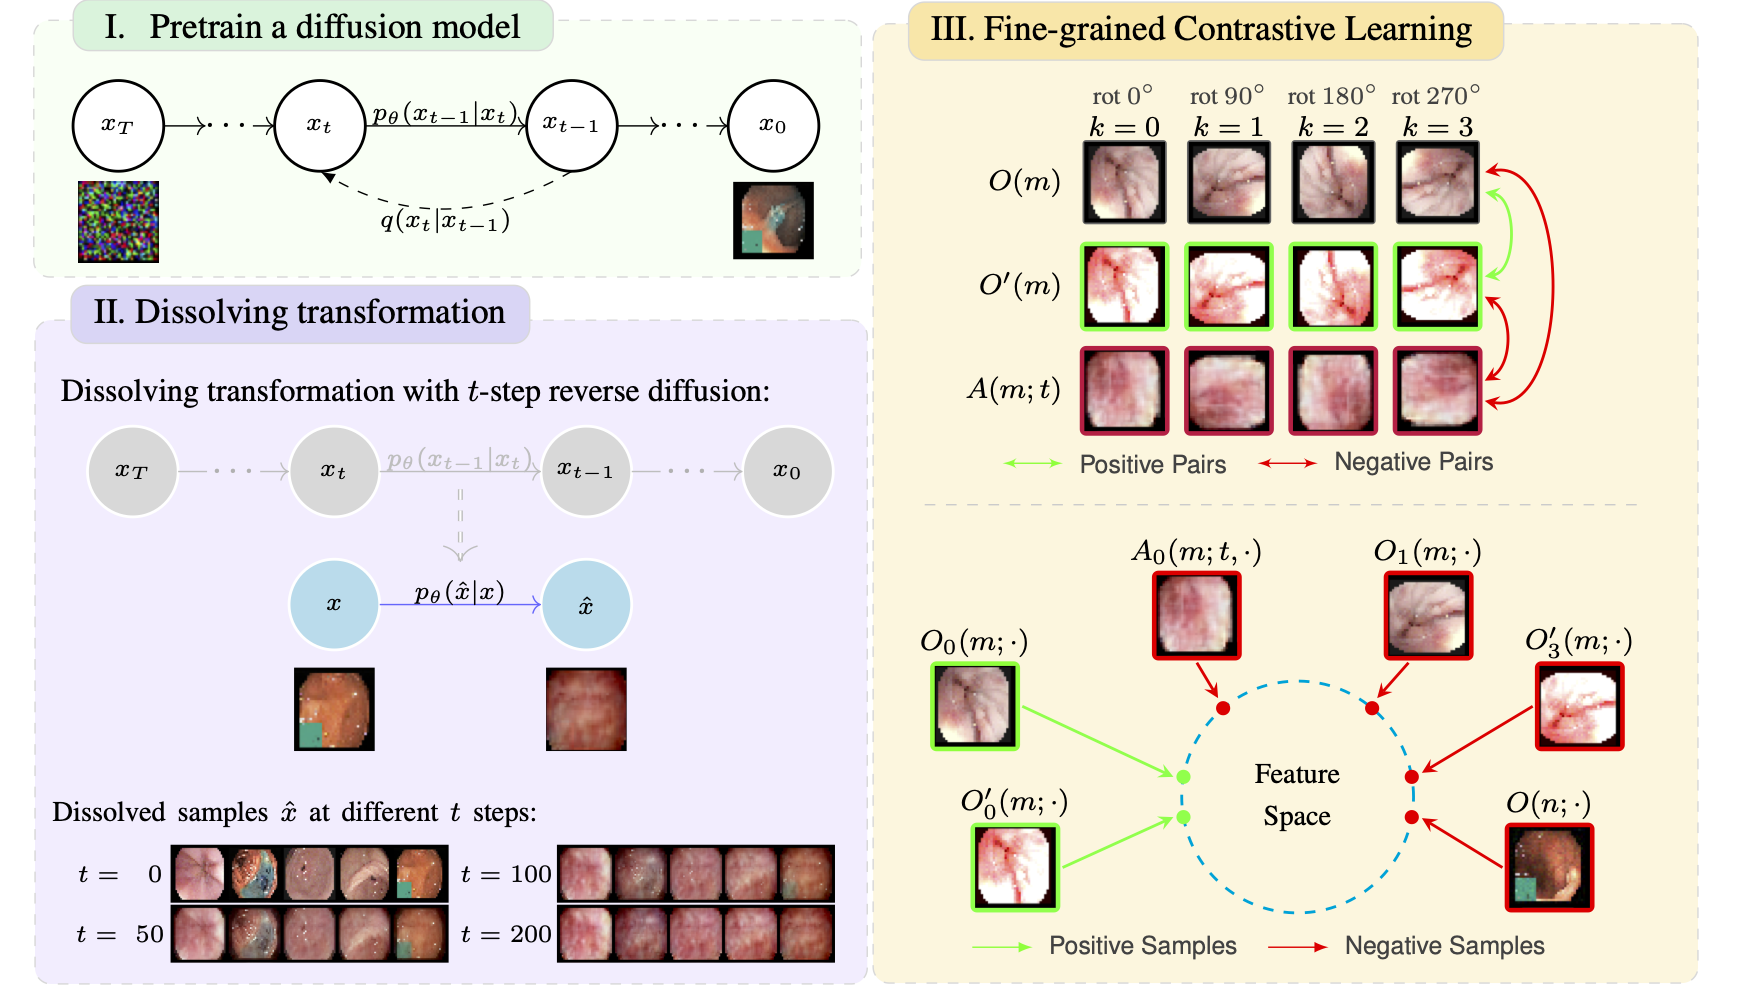

# **Import libraries**

In [11]:
!pip install denoising_diffusion_pytorch==0.27.12
!pip install medmnist==2.1.0
!pip install pytorch_fid
!pip install tensorboardX==2.6
!pip install kornia==0.6.8
!pip install torchlars==0.1.2
!pip install diffdist==0.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.1/290.1 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

# **Connect to the colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
cd /content/drive/MyDrive/DIA

/content/drive/.shortcut-targets-by-id/1Ksfa737SnYkthr3VmARou-_K6xkjhJby/DIA


Train without min-snr

In [6]:
!python train_eval_ddpm.py --mode train --dataset pneumonia

ddpm_models/medmnist/pneumonia-32-20240320-150119 [0]
Using downloaded and verified file: /content/drive/MyDrive/BS.c_project/Dataset/pneumoniamnist.npz
4708
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
loss: 0.1975:  10% 2499/25000 [17:47<1:50:53,  3.38it/s]
sampling loop time step:   0% 0/250 [00:00<?, ?it/s]
sampling loop time step:   1% 2/250 [00:00<00:14, 17.06it/s]
sampling loop time step:   2% 6/250 [00:00<00:09, 26.16it/s]
sampling loop time step:   4% 10/250 [00:00<00

# Train diffusion part (pneumonia)

In [ ]:
!python train_eval_ddpm.py --mode train --dataset pneumonia

ddpm_models/medmnist/pneumonia-32-20240308-113622 [0]
Using downloaded and verified file: /content/drive/MyDrive/BS.c_project/Dataset/pneumoniamnist.npz
4708
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Non-A100 GPU detected, using math or mem efficient attention if input tensor is on cuda
loss: 0.0975:  10% 2499/25000 [14:47<1:50:53,  3.38it/s]
sampling loop time step:   0% 0/250 [00:00<?, ?it/s]
sampling loop time step:   1% 2/250 [00:00<00:14, 17.06it/s]
sampling loop time step:   2% 6/250 [00:00<00:09, 26.16it/s]
sampling loop time step:   4% 10/250 [00:00<00

# **Train & Evaluate DIA**

# Train Dia

In [ ]:
!python train.py --data_root /content/drive/MyDrive/Dataset --dataset pneumoniamnist --model resnet18 --mode simclr_DIA --shift_trans_type diffusion_rotation --diff_resolution 32 --batch_size 32 --one_class_idx 0 --save_step 1  --diffusion_model_path /content/drive/MyDrive/DIA/models/ddpm_models/medmnist/pneumonia-32-20240223-142013/model-10.pt

Streaming output truncated to the last 5000 lines.
0.8302	0.8302
[2024-02-23 18:06:37.191506] [Epoch  97] [Best baseline 0.8535] [Best clean_norm 0.8521] [Best similar 0.6518] [Best CSI 0.8861]
Epoch 98 (logs/pneumoniamnist_resnet18_unsup_simclr_DIA_shift_DIA_diffusion_rotation_res32_one_class_0)
[2024-02-23 18:06:37.710203] [Epoch  98;   0] [Time 0.218] [Data 0.083] [LR 0.98144]
[LossC 0.000000] [LossSim 2.767000] [LossShift 0.000246]
[2024-02-23 18:06:53.377150] [DONE] [Time 0.192] [Data 0.414] [LossC 0.000000] [LossSim 2.777312] [LossShift 0.001864]
[2024-02-23 18:06:55.245773] {'one_class_1': {'baseline': 0.5809609905763752, 'clean_norm': 0.6703922857769012, 'similar': 0.4405982905982906}}
Using downloaded and verified file: /content/drive/MyDrive/Dataset/pneumoniamnist.npz
Using downloaded and verified file: /content/drive/MyDrive/Dataset/pneumoniamnist.npz
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker

# **Evaluate DIA**

In [ ]:
!python eval.py --mode ood_pre  --data_root /content/drive/MyDrive/Dataset --dataset pneumoniamnist  --model resnet18 --ood_score CSI --shift_trans_type rotation --print_score --diffusion_upper_offset 0. --diffusion_offset 0. --ood_samples 10 --resize_factor 0.54 --resize_fix --one_class_idx 0 --load_path /content/drive/MyDrive/DIA/logs/pneumoniamnist_resnet18_unsup_simclr_DIA_shift_DIA_diffusion_rotation_res32_one_class_0/best_CSI.model

Using downloaded and verified file: /content/drive/MyDrive/Dataset/pneumoniamnist.npz
Using downloaded and verified file: /content/drive/MyDrive/Dataset/pneumoniamnist.npz
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Pre-compute global statistics...
axis size: 1214 1214 1214 1214
weight_sim:	0.0606	0.0563	0.0657	0.0472
weight_shi:	0.0389	0.0384	0.0410	0.0318
Pre-compute features...
Compute OOD scores... (score: CSI)
One_class_real_mean: 0.907341661187815
pneumoniamnist     2.0389 +- 0.4569    q0: 0.2946    q10: 1.4943    q20: 1.6618    q30: 1.7964    q40: 1.9083  

# **Train & Evaluate DIA with SimSiam (Final)**

# Train Dia

In [ ]:
!python train.py --data_root /content/drive/MyDrive/Dataset --dataset pneumoniamnist --model resnet18_simsiam --mode simclr_DIA --shift_trans_type diffusion_rotation --diff_resolution 32 --batch_size 32 --one_class_idx 0 --save_step 1  --diffusion_model_path /content/drive/MyDrive/DIA/models/ddpm_models/medmnist/pneumonia-32-20240223-142013/model-10.pt

Streaming output truncated to the last 5000 lines.
Pre-compute features...
Compute OOD scores... (score: CSI)
One_class_real_mean: 0.8011724742493973
pneumoniamnist     1.9473 +- 0.2934    q0: 0.0825    q10: 1.6102    q20: 1.7377    q30: 1.8259    q40: 1.9080    q50: 1.9759    q60: 2.0564    q70: 2.1178    q80: 2.1791    q90: 2.2642    q100: 2.4854
one_class_1        1.5618 +- 0.3750    q0: 0.4142    q10: 1.0772    q20: 1.2567    q30: 1.3759    q40: 1.4937    q50: 1.5765    q60: 1.6792    q70: 1.7783    q80: 1.8976    q90: 2.0344    q100: 2.3843
[one_class_1 CSI 0.8012] [one_class_1 best 0.8012] 
[one_class_mean CSI 0.8012] [one_class_mean best 0.8012] 
0.8012	0.8012
[2024-03-09 19:13:07.768463] [Epoch  53] [Best baseline 0.8298] [Best clean_norm 0.8221] [Best similar 0.6328] [Best CSI 0.8745]
Epoch 54 (logs/pneumoniamnist_resnet18_simsiam_unsup_simclr_DIA_shift_DIA_diffusion_rotation_res32_one_class_0)
[2024-03-09 19:13:08.288683] [Epoch  54;   0] [Time 0.208] [Data 0.085] [LR 0.99544

In [ ]:
!python eval.py --mode ood_pre  --data_root /content/drive/MyDrive/Dataset --dataset pneumoniamnist  --model resnet18_simsiam --ood_score CSI --shift_trans_type rotation --print_score --diffusion_upper_offset 0. --diffusion_offset 0. --ood_samples 10 --resize_factor 0.54 --resize_fix --one_class_idx 0 --load_path /content/drive/MyDrive/DIA/logs/pneumoniamnist_resnet18_simsiam_unsup_simclr_DIA_shift_DIA_diffusion_rotation_res32_one_class_0/best_CSI.model

Using downloaded and verified file: /content/drive/MyDrive/Dataset/pneumoniamnist.npz
Using downloaded and verified file: /content/drive/MyDrive/Dataset/pneumoniamnist.npz
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Pre-compute global statistics...
axis size: 1214 1214 1214 1214
weight_sim:    0.0345    0.0273    0.0329    0.0341
weight_shi:    0.0468    0.0389    0.0442    0.0399
Pre-compute features...
Compute OOD scores... (score: CSI)
One_class_real_mean: 0.9129804952881877
pneumoniamnist     2.0652 +- 0.5570    q0: 0.1683    q10: 1.3763    q20: 1.5493    q30

# **LAG DATASET (DDPM)**

In [7]:
!python train_eval_ddpm.py --mode train --dataset lag


ddpm_models/lag-32-20250310-174745 [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 310MB/s]
loss: 0.0970:  10% 2499/25000 [15:47<2:16:05,  4.93it/s]
sampling loop time step:   0% 0/250 [00:00<?, ?it/s]
sampling loop time step:   0% 1/250 [00:00<01:38,  2.91it/s]
sampling loop time step:   2% 4/250 [00:00<00:27,  9.111it/s]
sampling loop

In [ ]:
!python train.py --data_root /content/drive/MyDrive/Dataset --dataset lag --model resnet18_imagenet --mode simclr_DIA --shift_trans_type diffusion_rotation --diff_resolution 32 --batch_size 32 --one_class_idx 0 --save_step 1  --diffusion_model_path /content/drive/MyDrive/DIA/models/ddpm_models/lag-32-20240310-172745/model-10.pt

[2024-03-13 14:40:50.238426] Namespace(dataset='lag', data_root='/content/drive/MyDrive/Dataset', one_class_idx=0, model='resnet14_imagenet', mode='simclr_DIA', simclr_dim=128, shift_trans_type='diffusion_rotation', diffusion_model_path='/content/drive/MyDrive/BS.c_project/DIA/diffusion_models/ddpm_models/medmnist/pneumonia-32-20240203-114905/model-10.pt', diff_resolution=32, kernel_size=7, resize_to_constant=False, local_rank=0, resume_path=None, load_path=None, no_strict=False, suffix=None, error_step=5, save_step=1, epochs=1000, optimizer='lars', lr_scheduler='cosine', warmup=10, lr_init=0.1, weight_decay=1e-06, batch_size=32, test_batch_size=100, diffusion_offset=0.3, diffusion_upper_offset=1.0, sim_lambda=1.0, temperature=0.5, ood_dataset=[1], ood_score=['norm_mean'], ood_layer='simclr', ood_samples=1, ood_batch_size=100, resize_factor=0.08, resize_fix=False, print_score=False, save_score=False, n_gpus=1, multi_gpu=False, image_size=(28, 28, 3), n_classes=2, n_superclasses=2, shif

In [19]:
!python eval.py --mode ood_pre  --data_root /content/drive/MyDrive/ --dataset lag  --model resnet18_imagenet --ood_score CSI --shift_trans_type rotation --print_score --diffusion_upper_offset 0. --diffusion_offset 0. --ood_samples 10 --resize_factor 0.54 --resize_fix --one_class_idx 0 --load_path /content/drive/MyDrive/DIA/logs/lag_resnet18_imagenet_unsup_simclr_DIA_shift_DIA_diffusion_rotation_res32_one_class_0/best_CSI.model

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Pre-compute global statistics...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
axis size: 3143 3

# **LAG Dataset** (Final)

In [ ]:
!python train_eval_ddpm.py --mode train --dataset lag

ddpm_models/lag-32-20240310-182745 [0]
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 24 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 310MB/s]
loss: 0.0860:  10% 2499/25000 [10:44<1:16:04,  4.93it/s]
sampling loop time step:   0% 0/250 [00:00<?, ?it/s]
sampling loop time step:   0% 1/250 [00:00<01:28,  2.81it/s]
sampling loop time step:   2% 4/250 [00:00<00:26,  9.31it/s]
sampling loop t

In [ ]:
!python train.py --data_root /content/drive/MyDrive/Dataset --dataset lag --model resnet18_imagenet_simsiam --mode simclr_DIA --shift_trans_type diffusion_rotation --diff_resolution 32 --batch_size 32 --one_class_idx 0 --save_step 1  --diffusion_model_path /content/drive/MyDrive/DIA/diffusion_models/ddpm_models/lag-32-20240310-182745/model-10.pt

3143
log_dir is not empty. All data inside log_dir will be deleted. Will you proceed [y/N]? y
[2024-03-11 04:37:13.819365] Namespace(dataset='lag', data_root='/content/drive/MyDrive/Dataset', one_class_idx=0, model='resnet18_imagenet_simsiam', mode='simclr_DIA', simclr_dim=128, shift_trans_type='diffusion_rotation', diffusion_model_path='/content/drive/MyDrive/DIA/diffusion_models/ddpm_models/lag-32-20240310-182745/model-10.pt', loss_mode='shifted_removed', diffusion_scheduler='uniform', diff_resolution=32, contamination_ratio=0.0, kernel_size=7, resize_to_constant=False, local_rank=0, resume_path=None, load_path=None, no_strict=False, suffix=None, error_step=5, save_step=1, epochs=1000, optimizer='lars', lr_scheduler='cosine', warmup=10, lr_init=0.1, weight_decay=1e-06, batch_size=32, test_batch_size=100, diffusion_offset=0.3, diffusion_upper_offset=1.0, sim_lambda=1.0, simsiam_lambda=1.0, temperature=0.5, ood_dataset=[1], ood_score=['norm_mean'], ood_layer='simclr', ood_samples=1, oo

In [ ]:
!python eval.py --mode ood_pre  --data_root /content/drive/MyDrive/ --dataset lag  --model resnet18_imagenet_simsiam --ood_score CSI --shift_trans_type rotation --print_score --diffusion_upper_offset 0. --diffusion_offset 0. --ood_samples 10 --resize_factor 0.54 --resize_fix --one_class_idx 0 --load_path /content/drive/MyDrive/DIA/logs/lag_resnet18_imagenet_simsiam_unsup_simclr_DIA_shift_DIA_diffusion_rotation_res32_one_class_0/best_CSI.model


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
Pre-compute global statistics...
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
axis size: 3143 